In [1]:
import numpy as np
from multiple_factor import DGP2, Inferece2
from dgp import DGP
import pickle

def reject_prob(Xdim, num_factor, sample_size, tau=0, ntrials=200, more=False, design='MT'):
    phi_tau = np.zeros(ntrials)
    for i in range(ntrials):
        dgp = DGP2(num_factor, sample_size, Xdim, tau, more, design)
        Y, D, tuple_idx = dgp.Y, dgp.D, dgp.tuple_idx
        inf = Inferece2(Y, D, tuple_idx, design)
        phi_tau[i] = inf.phi_tau
    return np.mean(phi_tau)


In [2]:
from joblib import Parallel, delayed
import multiprocessing

model_specs = [(1,1),(8,1),(8,4)]
taus_list = [np.linspace(0, .15, 24), np.linspace(0, .05, 24), np.linspace(0, .1, 24)]
num_cores = multiprocessing.cpu_count()

results = {}
for i, (q,k) in enumerate(model_specs):
    result = {}
    def processInput(t):
        mt = reject_prob(q, k, 1280, tau=t, ntrials=500, more=False, design='MT')
        mt2 = reject_prob(q, k, 1280, tau=t, ntrials=500, more=True, design='MT')
        #mt, mt2 = 0, 1
        c = reject_prob(q, k, 1280, tau=t, ntrials=500, more=False, design='C')
        s4 = reject_prob(q, k, 1280, tau=t, ntrials=500, more=False, design='S4')
        return (mt,mt2,c,s4)
    ret = Parallel(n_jobs=num_cores)(delayed(processInput)(t) for t in taus_list[i])
    result['MT'] = [r[0] for r in ret]
    result['MT2'] = [r[1] for r in ret]
    result['C'] = [r[2] for r in ret]
    result['S4'] = [r[3] for r in ret]
    results["q={},k={}".format(q,k)] = result
    print(q,k)

with open('simulation5_power_plots2.pkl', 'wb') as f:
    pickle.dump(results, f)

1 1


/Users/liujizhou/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


8 1
8 4


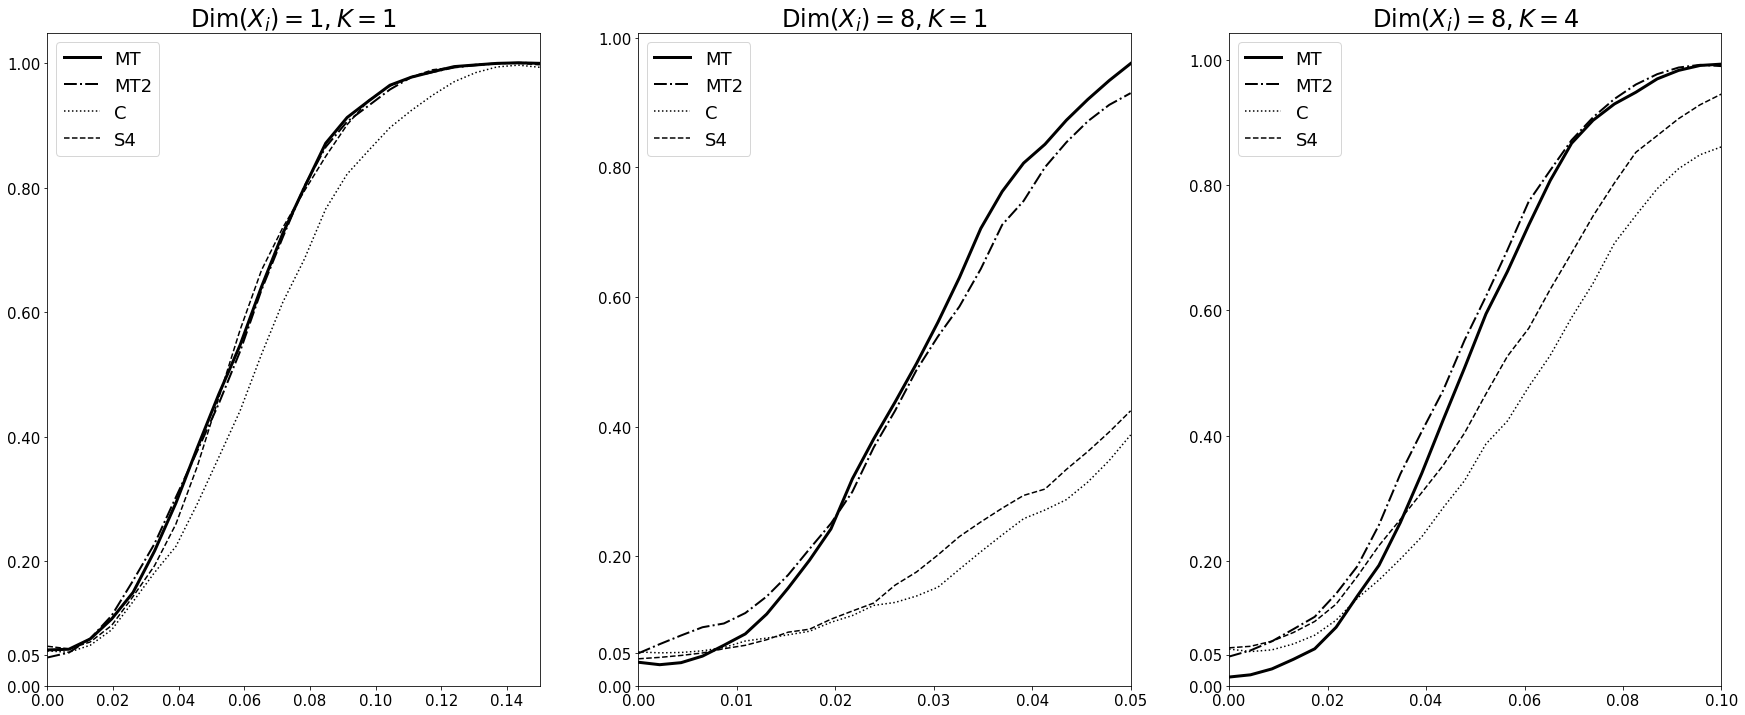

In [57]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

fig, axs = plt.subplots(1, 3, figsize=(30,12))
styles = ['-', 'dashdot', ':', 'dashed']
designs = ['MT','MT2','C','S4']
width = [3,2,1.5,1.5]
model_specs = [(1,1),(8,1),(8,4)]
taus_list = [np.linspace(0, .15, 24), np.linspace(0, .05, 24), np.linspace(0, .1, 24)]
rights = [.15, .05, .1]

for i, (q,k) in enumerate(model_specs):
    for j, design in enumerate(designs):
        p = results["q={},k={}".format(q,k)][design]
        x, y = taus_list[i], p
        y = savgol_filter(p, 7, 2)
        axs[i].plot(x, y, label=design, color='black', linewidth=width[j], linestyle=styles[j])
        axs[i].set_ylim(bottom=0)
        axs[i].set_xlim(left=0, right=rights[i])
        axs[i].set_yticks([0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
        axs[i].xaxis.set_tick_params(labelsize=15)
        axs[i].yaxis.set_tick_params(labelsize=15)
    axs[i].set_title(r'Dim$(X_i)={}, K={}$'.format(q,k), fontdict={'fontsize': 24, 'fontweight': 'medium'})
    axs[i].legend(prop={'size': 18})

In [ ]:
file = open("simulation5_power_plots.pkl",'rb')
results = pickle.load(file)
ret = results['q=8,k=1']
print(ret['MT'])
print(ret['MT2'])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.945, 0.775, 0.53, 0.27, 0.06, 0.025, 0.035, 0.27, 0.545, 0.775, 0.955, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.985, 0.93, 0.8, 0.515, 0.26, 0.11, 0.07, 0.085, 0.265, 0.55, 0.775, 0.93, 0.97, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
